##Milestone 1

In [ ]:
!pip install python-dotenv

In [ ]:
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
load_dotenv('api.env')
api_key = os.getenv('TOGETHER_KEY')

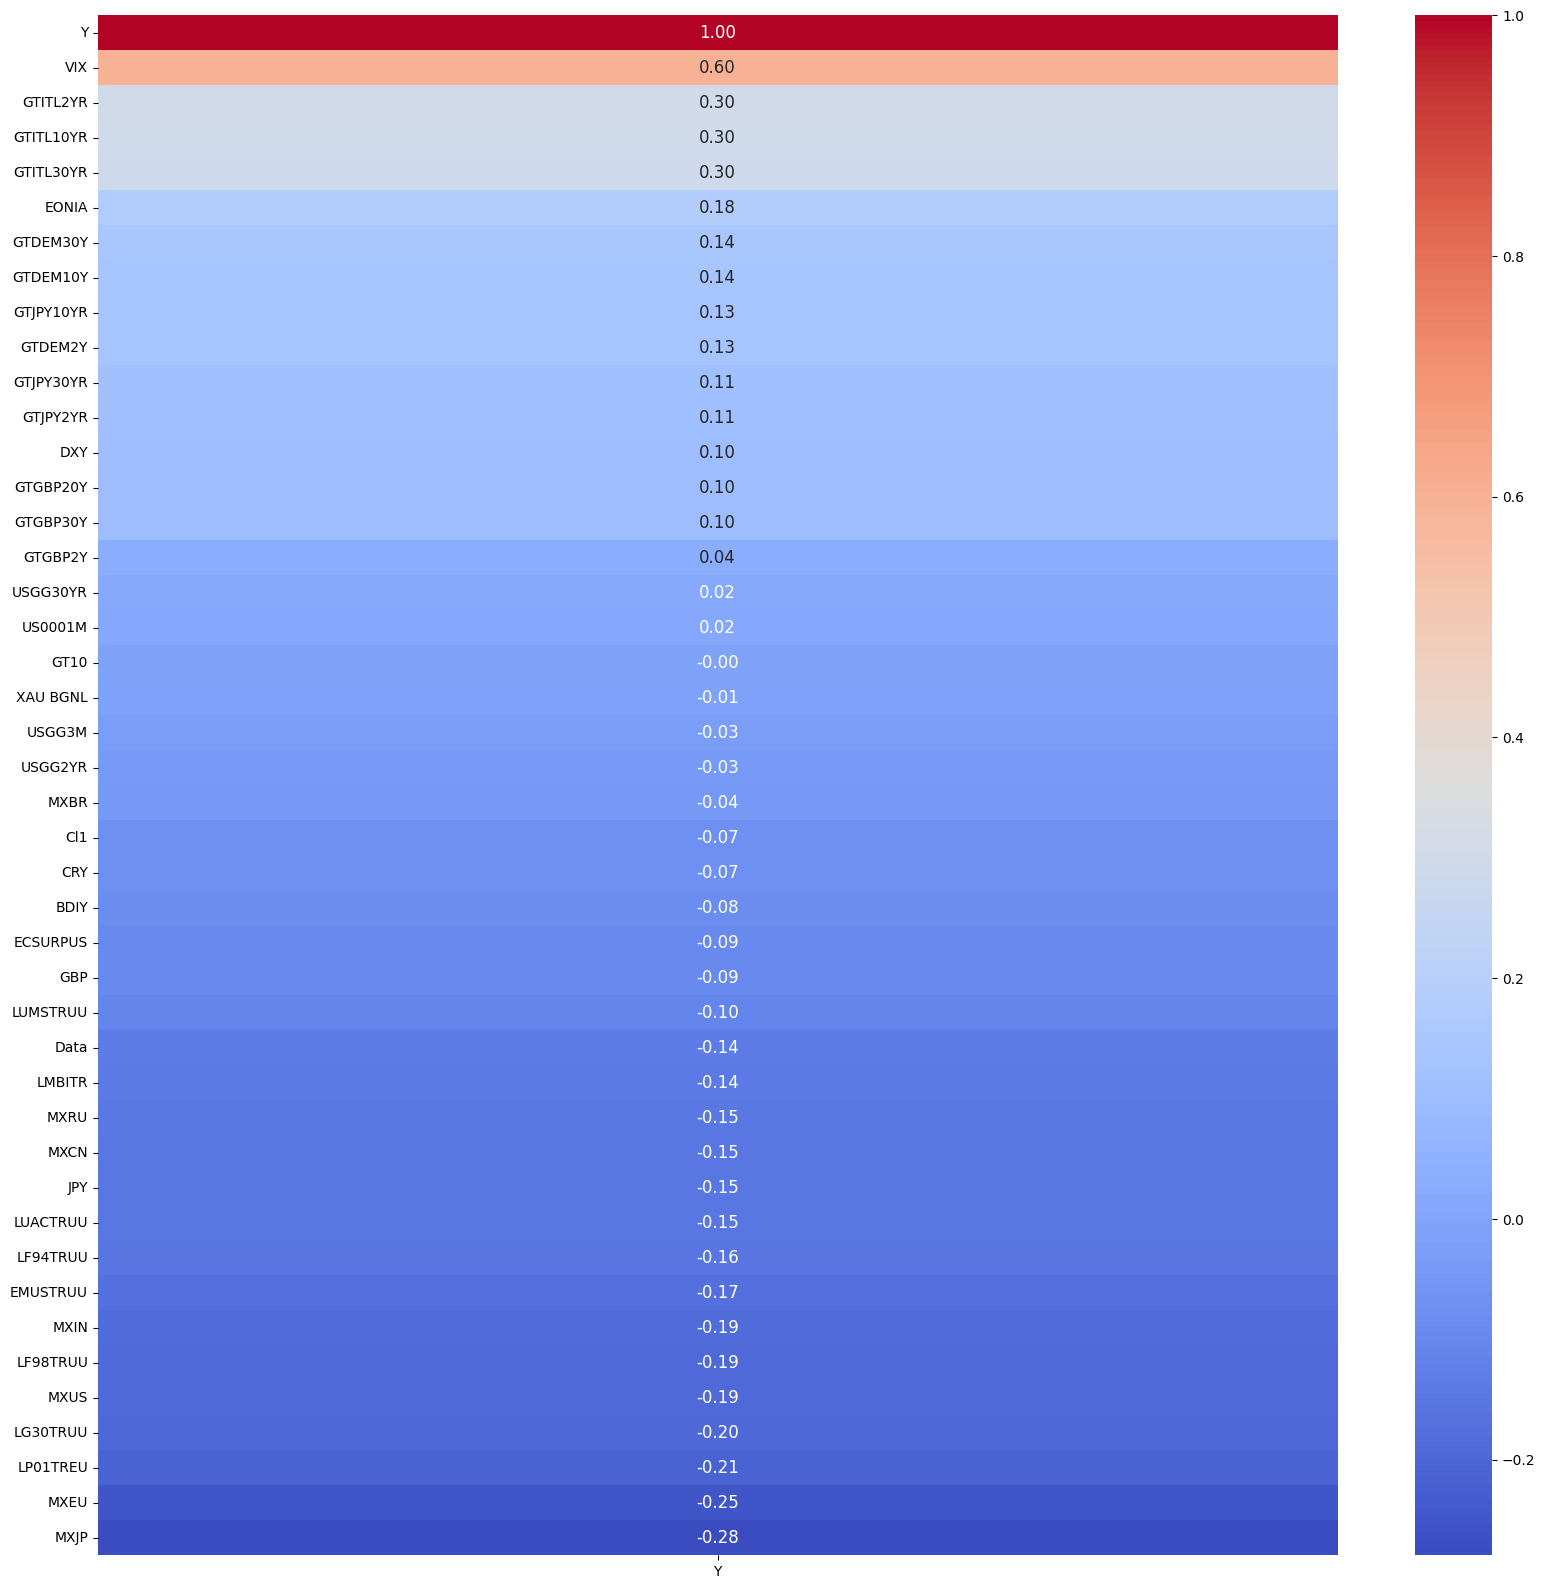

In [ ]:
df = pd.read_csv('FinancialMarketData.csv')

df['Data'] = pd.to_datetime(df['Data'])

window_size = 30
X = []
y = []
feature_columns = ['XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP', 'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA']
for i in range(len(df) - window_size):
    window = df.iloc[i:i + window_size][feature_columns].values
    X.append(window)

    if df.iloc[i + window_size]['Y'] == 1:
        y.append(1)
    else:
        y.append(0)

X = np.array(X)
y = np.array(y)

n_samples, time_steps, n_features = X.shape
X_reshaped = X.reshape(n_samples, time_steps * n_features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)

X_scaled = X_scaled.reshape(n_samples, time_steps, n_features)

X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_scaled.reshape(n_samples, -1), y)

X_resampled = X_resampled.reshape(-1, time_steps, n_features)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_resampled.shape[1], X_resampled.shape[2])))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_resampled, y_resampled, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.6831 - loss: 0.5991
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.8039 - loss: 0.3988
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8309 - loss: 0.3541
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8344 - loss: 0.3327
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8562 - loss: 0.3167
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8727 - loss: 0.2943
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8867 - loss: 0.2575
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8930 - loss: 0.2819
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8924 - loss: 0.2628
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8869 - loss: 0.2547


##Milestone 2

In [ ]:
capital = 10000
portfolio_value = capital
cash = capital
invested = 0
investment_ratio = 0.8

portfolio_history = []

for i in range(len(X)):
    df_index = i + window_size
    p_crash = model.predict(X[i].reshape(1, -1, X.shape[2]))[0][0]

    if df_index + 1 < len(df):
        daily_return = (df.iloc[df_index + 1]['XAU BGNL'] - df.iloc[df_index]['XAU BGNL']) / df.iloc[df_index]['XAU BGNL']
    else:
        daily_return = 0

    if p_crash > 0.5:
        cash += invested
        invested = 0
        print(f"Index {df_index}: High crash probability. Sell all positions. Cash: {cash:.2f}, Invested: {invested:.2f}")

    else:
        if invested == 0:
            invested = cash * investment_ratio
            cash -= invested
            print(f"Index {df_index}: Low crash probability. Buy positions. Cash: {cash:.2f}, Invested: {invested:.2f}")

        invested *= (1 + daily_return)

    portfolio_value = cash + invested
    portfolio_history.append(portfolio_value)

print(f"Final Portfolio Value: ${portfolio_value:.2f}")
with open('portfolio_history.txt', 'w') as f:
    for value in portfolio_history:
        f.write(f"{value:.2f}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Index 30: Low crash probability. Buy positions. Cash: 2000.00, Invested: 8000.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━

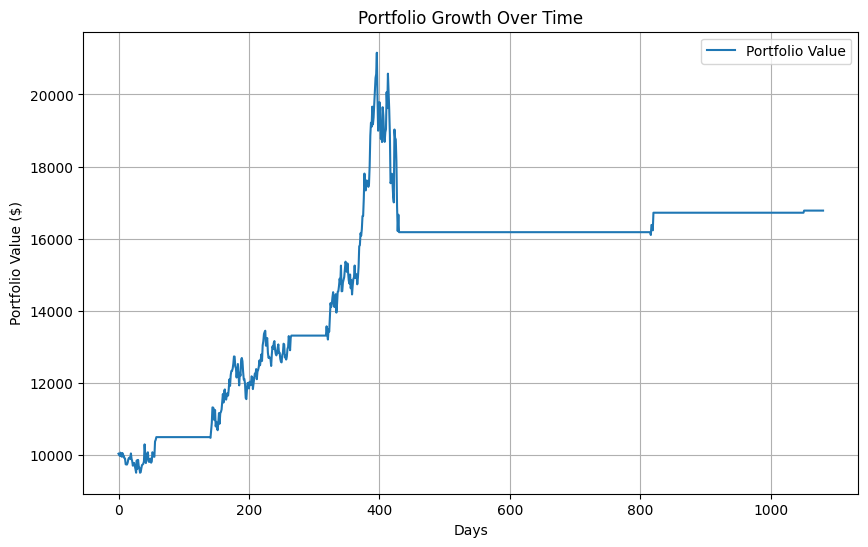

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(portfolio_history, label='Portfolio Value')
plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Growth Over Time')
plt.legend()
plt.grid()
plt.savefig('portfolio_growth.png')
plt.show()


##Milestone 3

In [ ]:
from openai import OpenAI

In [ ]:
client = OpenAI(
  api_key=api_key,
  base_url="https://api.together.xyz/v1",
)

In [ ]:
prompt = f"""You are a financial advisor bot designed to explain complex investment strategies in simple, actionable terms for end users with varying levels of financial knowledge.

Here’s the context:

Our investment strategy uses machine learning to predict market crashes based on financial indicators {feature_columns}.
If the model predicts a high probability of a market crash, the strategy advises selling all positions to minimize losses. If the probability of a crash is low, the strategy advises holding positions to maximize potential gains.
The strategy involves monitoring daily predictions and adjusting investments dynamically.
Explain this investment strategy to users in an engaging, conversational tone. Focus on:

What the strategy is and how it works.
How users can act on the predictions to grow their money.
Why this approach is beneficial compared to traditional investment methods.
Reassurance about risk management and transparency.
Provide examples or analogies if necessary to make the explanation easier to understand. Avoid technical jargon and ensure the explanation is actionable.
strategy implemented in code '''capital = 10000  # Starting capital
positions = 0  # Number of assets owned
capital_history = []

for i in range(len(df) - 1):
    current_Y = df.iloc[i]['Y']
    p_crash = model.predict(X[i].reshape(1, -1, X.shape[2]))[0][0]

    # High crash probability: sell all positions
    if p_crash > crash_threshold and positions > 0:
        capital = positions * current_Y
        positions = 0  # Liquidate holdings

    # Low crash probability: buy if no holdings
    elif p_crash < safe_threshold and positions == 0:
        positions = capital / current_Y
        capital = 0  # Invest all capital

    # Track portfolio value
    portfolio_value = capital + (positions * current_Y if positions > 0 else 0)
    capital_history.append(portfolio_value)'''
explain

"""
print("Explanation Prompt: ", prompt)
raw_response = client.chat.completions.create(
  model = "meta-llama/Llama-3.2-3B-Instruct-Turbo",
  messages = [{
    "role": "user",
    "content": prompt
  }]
)
print(raw_response.choices[0].message.content)


Explanation Prompt:  You are a financial advisor bot designed to explain complex investment strategies in simple, actionable terms for end users with varying levels of financial knowledge.

Here’s the context:

Our investment strategy uses machine learning to predict market crashes based on financial indicators ['XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP', 'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA'].
If the model predicts a high probability of a market crash, the strategy advises selling all positions to minimize losses. If the probability of a crash is low, the strategy advises holding positions to maximize potential gains.
The strategy involves monitoring daily predictions and adjusting investments dynamically.
Explain this investment strategy to users in an engaging, conversational tone. Focus on:

What the strategy is and how it works.
How users can act on the predictions to grow their money.
Why this 